### Occupancy Grid Test

In [196]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
%matplotlib inline
import random

In [197]:
import pylab
# temp = np.linspace(0,1,640)
temp = 250*np.ones((1,640),dtype=np.int16)

In [198]:
temp2 = np.random.randint(-1, 2, 640, dtype='l')

In [199]:
boarder = np.empty(640,dtype=np.int16)
for t in range(0,len(temp[0,:])):
    temp2 = np.random.randint(-1, 2, 1, dtype='l')
    if t > 0:
        boarder[t] = boarder[t-1]+temp2
    else:
        boarder[t] = 240


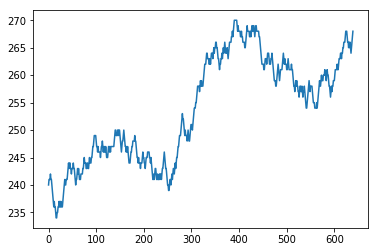

In [200]:
pylab.plot(boarder)

In [201]:
coeffY = [1.136*10**-7, -5.303*10**-6, 4.259*10**-3, 1.032 - 1.0414]


In [202]:
np.polyval(coeffY, 247)

2.4309060057999998

In [203]:
image = mpimg.imread("finalhorizontal1.jpg")

In [204]:
def get_M_MinvVisual(img):
    img_size = (img.shape[1],img.shape[0])  
    src = np.float32(
    [[6, 407],
    [156, 272],
    [429, 276],
    [559, 409]])  
    dst = np.float32(
    [[46, 1870],
    [46, 346],
    [1266, 346],
    [1266, 1870]])
    # compute perspective transform
    M = cv2.getPerspectiveTransform(src,dst)    
    Minv = cv2.getPerspectiveTransform(dst,src)   
    return M, Minv



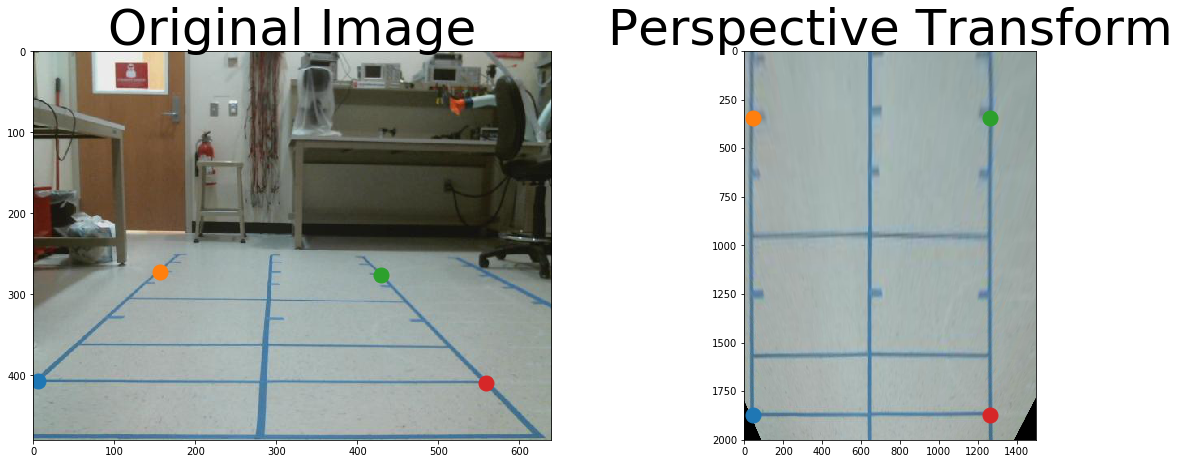

In [205]:

MVis, MinvVis = get_M_MinvVisual(image)

img_size = (1500,2000)   
topView = cv2.warpPerspective(image, MVis, img_size, flags=cv2.INTER_LINEAR)
    

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
f.tight_layout()
ax1.imshow(image)
  
ax1.plot(  6, 407,'.',markersize=30)
ax1.plot(156, 272,'.',markersize=30)
ax1.plot(429, 276,'.',markersize=30)
ax1.plot(559, 409,'.',markersize=30)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(topView)
ax2.plot(46,1870,'.',markersize=30)
ax2.plot(46, 346,'.',markersize=30)
ax2.plot(1266,346,'.',markersize=30)
ax2.plot(1266,1870,'.',markersize=30)
ax2.set_title('Perspective Transform', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### to cm coordinates

In [206]:
def get_M_Minv(img):
    img_size = (img.shape[1],img.shape[0])  
    src = np.float32(
    [[6, 407],
    [156, 272],
    [429, 276],
    [559, 409]])  
#     dst = np.float32(
#     [[46-750, 1346],
#     [46-750, 2870],
#     [1266-750, 2870],
#     [1266-750, 1346]])
    
    # in cm
    dst = np.float32(
    [[5-75, 135],
    [5-75, 287],
    [127-75, 287],
    [127-75, 135]])    
    # compute perspective transform
    M = cv2.getPerspectiveTransform(src,dst)    
    Minv = cv2.getPerspectiveTransform(dst,src)   
    return M, Minv




M, Minv = get_M_Minv(image)



In [207]:
M


array([[ -4.33360580e-01,   4.95007036e-02,   1.22555917e+02],
       [  2.13710962e-02,   1.00095746e-01,  -3.11064950e+02],
       [  1.87667248e-04,  -7.37737311e-03,   1.00000000e+00]])

In [123]:

def getWorld(points, M):

    
    xnum = np.matmul(M[0,:],np.transpose(points))
    xden = np.matmul(M[2,:],np.transpose(points))

    xworld = xnum/xden

    ynum = np.matmul(M[1,:],np.transpose(points))
    yden = xden

    yworld = ynum/yden

    return [(x,y) for x,y in zip(xworld, yworld)]     
    


In [124]:
# Takes tuple of (xpix, ypix)
def getWorldOLD(pixV, M):

    x = pixV[0]
    y = pixV[1]

    xnum = np.matmul(M[0,:],np.transpose([x, y,1]))
    xden = np.matmul(M[2,:],np.transpose([x, y,1]))
    xworld = xnum/xden

    ynum = np.matmul(M[1,:],np.transpose([x, y,1]))
    yden = xden
    yworld = ynum/yden
    return (xworld, yworld)

In [125]:
pixels = [(156, 272,1)]
world = getWorld(pixels, M)
print('(xworld, yworld) = ', world)


(xworld, yworld) =  [(-703.99999999999977, 2870.0)]


In [208]:
# Takes two tuples one for each pixel value
def getDist(pix1, pix2, M):
    
    world1 = getWorld(pix1, M)
    world2 = getWorld(pix2, M)
#     print(world1)
#     return world1
    disx = world2[0][0] - world1[0][0]
    disy = world2[0][1] - world1[0][1]
    
    return math.sqrt( disx**2 + disy**2 )

Actual Distance = 86.2 cm, Calculated Distance =  86.6992904158  cm


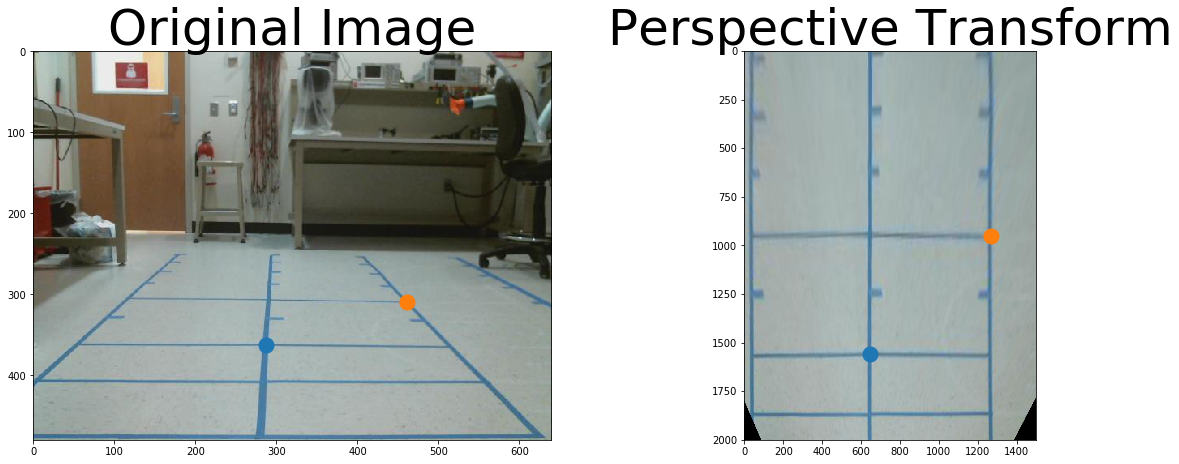

In [210]:
import math

pLoc1 = [(287,362,1)]
pLoc2 = [(462, 309,1)]

distance = getDist(pLoc1,pLoc2, M)

print('Actual Distance = 86.2 cm, Calculated Distance = ', \
      distance, ' cm')


# gets perspective tansform for visualization only
MVis, MinvVis = get_M_MinvVisual(image)

cm1 = getWorld(pLoc1, MVis)
cm2 = getWorld(pLoc2, MVis)



img_size = (1500,2000)   
topView = cv2.warpPerspective(image, MVis, img_size, flags=cv2.INTER_LINEAR)
    

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
f.tight_layout()
ax1.imshow(image)
  
ax1.plot(  287, 363,'.',markersize=30)
ax1.plot(461, 309,'.',markersize=30)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(topView)
ax2.plot(cm1[0][0],cm1[0][1],'.',markersize=30)
ax2.plot(cm2[0][0], cm2[0][1],'.',markersize=30)

ax2.set_title('Perspective Transform', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


### Test Vector from 

In [211]:
def convVecToXY(board):
     return [(x,y,1) for x,y in enumerate(board.tolist()) if y >  250]

In [349]:
#     [[6, 407],
#     [156, 272],
#     [429, 276],
#     [559, 409]])  
#     dst = np.float32(
#     [[46-750, 1346],
#     [46-750, 2870],
#     [1266-750, 2870],
#     [1266-750, 1346]])

testPoints = np.zeros(640,dtype=np.int16)
testPoints[6] = 407
testPoints[156] = 272
testPoints[429] = 276
testPoints[559] = 409   

xyzArray = convVecToXY(testPoints)
world = getWorld(xyzArray, M)
print( world)

[(-70.000000000000085, 134.99999999999989), (-70.000000000000057, 286.99999999999983), (51.999999999999936, 286.99999999999977), (51.999999999999886, 134.99999999999983)]


In [356]:
getWorld([(320,300,1)], M)

[(1.1006794579648693, 237.77953880233395)]

In [355]:
M

# test = np.loadtxt('longest.txt', delimiter=' ')

array([[ -4.33360580e-01,   4.95007036e-02,   1.22555917e+02],
       [  2.13710962e-02,   1.00095746e-01,  -3.11064950e+02],
       [  1.87667248e-04,  -7.37737311e-03,   1.00000000e+00]])

In [131]:
# time = test[:,0]
# x = test[:,1]
# y = test[:,2]
# z = test[:,3]
# qx = test[:,4]
# qy = test[:,5]
# qz = test[:,6]
# qw = test[:,7]


In [132]:
# test.shape
# 

(136, 8)

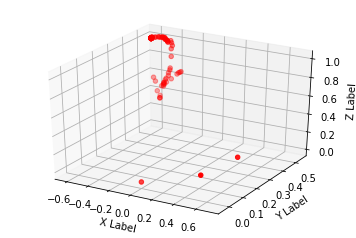

In [138]:

# %matplotlib notebook


# %matplotlib inline
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()

# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x,y,z, c='r', marker = 'o')
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()

### Test Image

In [213]:
image50 = mpimg.imread("marked_50.png")
# image50[:,:,0:3] = image50[:,:,0:3]

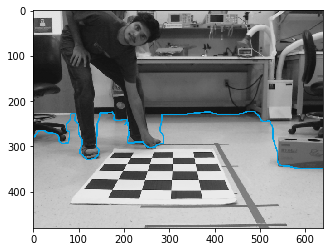

In [214]:
plt.imshow(image50)

In [215]:

mask = np.zeros_like(image50)
r_channel = image[:,:,0]
# g_channel = image[:,:,1]
# b_channel = image[:,:,2]
mask = np.zeros_like(r_channel)
mask[(r_channel == 0)] = 1 


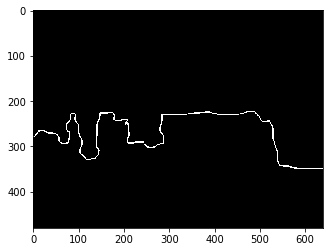

In [216]:
plt.imshow(mask,cmap='gray')

In [217]:
indices = np.argmax(mask,axis=0)

In [218]:
indices.shape

(640,)

### Form useful for cv2.perspectiveTransform

In [219]:
def convVecToXY2(board):
     return np.array([(x,y) for x,y in enumerate(board.tolist()) if y >  300],dtype='float32')

In [220]:
coords1 = convVecToXY2(indices)

In [322]:
world = cv2.perspectiveTransform(np.array([coords1]),M)

In [323]:
import matplotlib as mpl

In [324]:
cmap = mpl.colors.ListedColormap(['white','grey','black'])
w =world[0].astype(int)
xw = w[:,0]
yw = w[:,1]

In [273]:
world.shape

(2,)

In [297]:
world

array([[[ -68.03807831,  207.68032837],
        [ -67.38652802,  206.47531128],
        [ -66.7419281 ,  205.28315735],
        [ -66.10417938,  204.10366821],
        [ -65.15646362,  201.76982117],
        [ -64.84877014,  201.78187561],
        [ -64.23090363,  200.63916016],
        [ -63.61946869,  199.50834656],
        [ -63.01435089,  198.38922119],
        [ -62.71110535,  198.40061951],
        [ -62.40777588,  198.41203308],
        [ -62.10436249,  198.42344666],
        [ -61.80086899,  198.43487549],
        [ -61.49729538,  198.44628906],
        [ -61.19363785,  198.4577179 ],
        [ -60.88990021,  198.46914673],
        [ -60.58607864,  198.48057556],
        [ -60.28217316,  198.49201965],
        [ -59.97818756,  198.50344849],
        [ -59.9570961 ,  199.647995  ],
        [ -59.65135956,  199.65965271],
        [ -59.34553909,  199.67132568],
        [ -59.0396347 ,  199.6829834 ],
        [ -58.73365021,  199.69465637],
        [ -58.70557022,  200.85270691],


In [299]:
z[68][207]

1

In [307]:
xv, yv = np.meshgrid(xw, yw)
# z = np.zeros_like(xv*yv)
z = np.zeros((1000,1000),dtype= 'int32')

z[xv,yv]=1

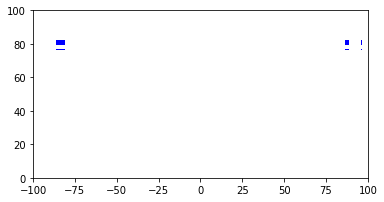

In [317]:
fig, ax = plt.subplots()

# define the colors
cmap = mpl.colors.ListedColormap(['w', 'b'])

# create a normalize object the describes the limits of
# each color
bounds = [0., 0.5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# plot it
ax.imshow(z.T, interpolation='none', extent = [-100, 100, 0, 100], cmap=cmap, norm=norm)

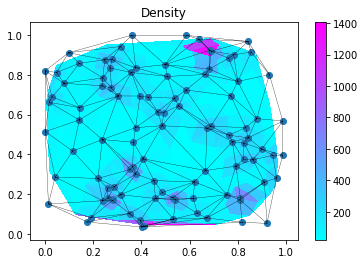

In [318]:
import numpy as np
from matplotlib.pyplot import (tripcolor, triplot, scatter,
    show, title, savefig, colorbar)
from matplotlib.tri import Triangulation, TriAnalyzer

# Coordinates
x = np.random.random(100)
y = np.random.random(100)

# Triangulation
tri = Triangulation(x, y)

# Remove flat triangles
mask = TriAnalyzer(tri).get_flat_tri_mask(0.01)
tri.set_mask(mask)

# Coordinates of the edges
ii1, ii2, ii3 = tri.triangles.T
x1 = x[ii1] ; y1 = y[ii1]
x2 = x[ii2] ; y2 = y[ii2]
x3 = x[ii3] ; y3 = y[ii3]

# Surfaces
surf = 0.5*np.abs((x2-x1)*(y3-y1)-(x3-x1)*(y2-y1))

# Density
dens = 1/(surf*3) # 3 points per triangle!

# Plot
xd = (x1+x2+x3)/3.
yd = (y1+y2+y3)/3.
tripcolor(xd, yd, dens, cmap='cool')
colorbar()
triplot(tri, color='k', linewidth=0.3)
scatter(x,y)
title('Density')
savefig('density.png')
show()

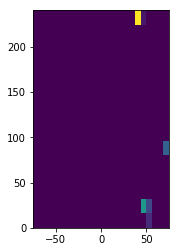

In [366]:
import numpy as np
import matplotlib.pyplot as plt



# x edges -75 cm to + 75 cm, 10 cm per bin
# y edges 0 to 240 cm, 10 cm per bin
xedges = np.linspace(-75, 75, 16)
yedges = np.linspace(0,240,25)
H, xedges, yedges = np.histogram2d(w[:,0],w[:,1], bins=[xedges,yedges])

im = plt.imshow(H, interpolation='nearest', origin='low',
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

In [361]:
w[:,0]

array([-68, -67, -66, -66, -65, -64, -64, -63, -63, -62, -62, -62, -61,
       -61, -61, -60, -60, -60, -59, -59, -59, -59, -59, -58, -58, -58,
       -58, -58, -22, -22, -22, -21, -21, -21, -20, -20, -20, -19,  83,
        82,  81,  80,  70,  69,  68,  68,  68,  68,  69,  69,  69,  70,
        70,  70,  70,  70,  71,  71,  71,  72,  72,  72,  73,  73,  73,
        74,  74,  74,  74,  74,  74,  75,  75,  75,  75,  75,  76,  76,
        76,  76,  77,  77,  77,  77,  77,  78,  78,  78,  79,  78,  79,
        79,  79,  80,  80,  80,  81,  81,  81,  82,  82,  82,  82,  83,
        83,  83,  84,  84,  84,  85,  85,  85,  86,  86,  86,  86,  87,
        87,  88,  88,  89,  89,  89,  89,  90,  90,  90,  91,  91,  91,
        92,  92,  92,  93,  93,  93,  94,  94,  94,  94,  94])

In [362]:
w[:,1]

array([207, 206, 205, 204, 201, 201, 200, 199, 198, 198, 198, 198, 198,
       198, 198, 198, 198, 198, 198, 199, 199, 199, 199, 199, 200, 200,
       202, 202, 234, 234, 234, 234, 234, 235, 235, 235, 235, 235, 237,
       232, 227, 224, 196, 193, 189, 188, 188, 187, 187, 187, 187, 187,
       187, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
       186, 186, 185, 185, 184, 184, 184, 184, 183, 183, 183, 183, 182,
       182, 182, 182, 182, 182, 181, 181, 181, 181, 181, 181, 180, 180,
       180, 180, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181,
       181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181,
       181, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182,
       182, 182, 182, 182, 182, 182, 182, 182, 181, 181, 181])

In [358]:
yedges

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
        180.,  190.,  200.,  210.,  220.,  230.,  240.])

TypeError: Dimensions of C (15, 24) are incompatible with X (16) and/or Y (25); see help(pcolormesh)

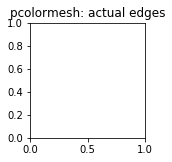

In [379]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(132, title='pcolormesh: actual edges',aspect='equal')
X,Y = np.meshgrid(xedges,yedges)
H = H.T
ax.pcolormesh(X,Y,H)

In [339]:
w[:,0]

array([-68, -67, -66, -66, -65, -64, -64, -63, -63, -62, -62, -62, -61,
       -61, -61, -60, -60, -60, -59, -59, -59, -59, -59, -58, -58, -58,
       -58, -58, -22, -22, -22, -21, -21, -21, -20, -20, -20, -19,  83,
        82,  81,  80,  70,  69,  68,  68,  68,  68,  69,  69,  69,  70,
        70,  70,  70,  70,  71,  71,  71,  72,  72,  72,  73,  73,  73,
        74,  74,  74,  74,  74,  74,  75,  75,  75,  75,  75,  76,  76,
        76,  76,  77,  77,  77,  77,  77,  78,  78,  78,  79,  78,  79,
        79,  79,  80,  80,  80,  81,  81,  81,  82,  82,  82,  82,  83,
        83,  83,  84,  84,  84,  85,  85,  85,  86,  86,  86,  86,  87,
        87,  88,  88,  89,  89,  89,  89,  90,  90,  90,  91,  91,  91,
        92,  92,  92,  93,  93,  93,  94,  94,  94,  94,  94])

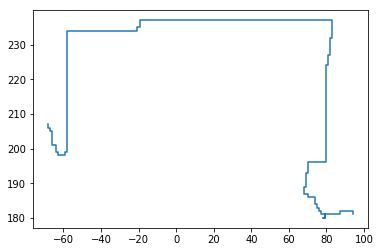

In [380]:
plt.step(w[:,0],w[:,1])

In [382]:
import plotly.plotly as py
import plotly.graph_objs as go